# Tests for `RayPair`
---
---
---

**Note:** For these tests the Magritte python bindings should be compiled without Grid-SIMD vectoriztion.

In [1]:
import numpy             as np
import matplotlib.pyplot as plt

Load the relevant Magritte modules

In [2]:
from sys import path
path.insert (0, '../../bin/')

In [3]:
from magritte import RayPair, vreal

## Tests for `RayPair :: solve`
---
---

In [4]:
def eta (z):
    return 1.0

In [5]:
def chi (z):
    return 0.3

In [6]:
def dZ (d):
    return 0.1

---

In [7]:
def Z (d):
    Z = 0
    for i in range(d):
        Z += dZ(d)
    return Z

---

### Setup

In [8]:
n_r  = 4
n_ar = 4

In [9]:
n = n_r + n_ar + 1   # number of points on the ray. (= rayPair.ndep)

In [10]:
n_off_diag = 3

In [11]:
rayPair = RayPair (n, n_off_diag)

In [12]:
rayPair.initialize (n_r, n_ar)

In [13]:
for d in range(0, n):
    rayPair.set_term1_and_term2 (eta(Z(d)), chi(Z(d)), d)

TypeError: set_term1_and_term2(): incompatible function arguments. The following argument types are supported:
    1. (self: magritte.RayPair, arg0: Grid::Grid_simd<double, double __vector(4)>, arg1: Grid::Grid_simd<double, double __vector(4)>, arg2: int) -> None

Invoked with: <magritte.RayPair object at 0x7f03d3c8cc30>, 1.0, 0.3, 0

In [14]:
for d in range(0, n):
    rayPair.set_term1_and_term2 (0.1, 0.1, d)

TypeError: set_term1_and_term2(): incompatible function arguments. The following argument types are supported:
    1. (self: magritte.RayPair, arg0: Grid::Grid_simd<double, double __vector(4)>, arg1: Grid::Grid_simd<double, double __vector(4)>, arg2: int) -> None

Invoked with: <magritte.RayPair object at 0x7f03d3c8cc30>, 0.1, 0.1, 0

In [25]:
for d in range(1, n):
    rayPair.set_dtau (chi(Z(d)), chi(Z(d-1)), dZ(d), d-1)

In [26]:
rayPair.I_bdy_0 = 0.0
rayPair.I_bdy_n = 0.0

### Solve

In [27]:
rayPair.solve()

### Tests

Construct `T`-matrix (defined in Fautrier's equation $\text{T} u = S$) from information in RayPair.

In [28]:
T = np.zeros((n, n))

for d in range(1, n):
    T[d,d-1] = -rayPair.A[d  ]
    T[d-1,d] = -rayPair.C[d-1]
    
for d in range(1, n-1):
    T[d,d] = 1.0 + rayPair.A[d] + rayPair.C[d]
    
T[  0,   0] = 1.0 + 2.0 / rayPair.dtau[  0] + 2.0 / rayPair.dtau[  0] / rayPair.dtau[  0]
T[n-1, n-1] = 1.0 + 2.0 / rayPair.dtau[n-2] + 2.0 / rayPair.dtau[n-2] / rayPair.dtau[n-2]

print(np.linalg.inv(T))

[[0.00749989 0.01455652 0.01412637 0.01370893 0.01330382 0.00645535]
 [0.00727826 0.01499977 0.01455652 0.01412636 0.01370892 0.00665191]
 [0.00706318 0.01455652 0.01499977 0.01455651 0.01412636 0.00685446]
 [0.00685446 0.01412636 0.01455651 0.01499977 0.01455652 0.00706318]
 [0.00665191 0.01370892 0.01412636 0.01455652 0.01499977 0.00727826]
 [0.00645535 0.01330382 0.01370893 0.01412637 0.01455652 0.00749989]]


In [29]:
L = np.zeros((n, n))

for d in range(n):
    L[d,d] = rayPair.L_diag[d]
    
for m in range(n_off_diag):
    for d in range(n-m-1):
        L[d,m+1+d] = rayPair.L_upper[m][d]
        L[m+1+d,d] = rayPair.L_lower[m][d]

print(L)

[[0.00749989 0.01455652 0.01412637 0.01370893 0.         0.        ]
 [0.00727826 0.01499977 0.01455652 0.01412636 0.01370892 0.        ]
 [0.00706318 0.01455652 0.01499977 0.01455651 0.01412636 0.00685446]
 [0.00685446 0.01412636 0.01455651 0.01499977 0.01455652 0.00706318]
 [0.         0.01370892 0.01412636 0.01455652 0.01499977 0.00727826]
 [0.         0.         0.01370893 0.01412637 0.01455652 0.00749989]]


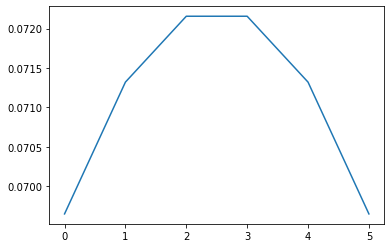

In [30]:
plt.plot(rayPair.Su)